In [152]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [77]:
df=pd.read_csv('no_show.csv')

In [78]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [79]:
df=df.drop(columns=['PatientId', 'AppointmentID'])

In [80]:
df.dtypes

Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

In [128]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

In [82]:
df['Gender']=df['Gender'].replace({'M':'0','F':'1'}).astype(int)

In [83]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [84]:
df['wating days']=(df['AppointmentDay']-df['ScheduledDay']).dt.days

In [85]:
df['scheduling day']=df['ScheduledDay'].dt.dayofweek
df['veiw day']=df['AppointmentDay'].dt.dayofweek
df['scheduling hour']=df['ScheduledDay'].dt.hour
df['appointment hour']=df['AppointmentDay'].dt.hour

In [86]:
df['scheduling day'].value_counts()

scheduling day
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: count, dtype: int64

In [87]:
place=pd.get_dummies(df,columns=['Neighbourhood'],drop_first=True)

In [88]:
place=df['Neighbourhood']

In [89]:
place=pd.get_dummies(place).astype(int)

In [90]:
place.shape

(110527, 81)

In [91]:
data=pd.concat([df,place],axis=1)

In [92]:
data.shape

(110527, 98)

In [93]:
data=data.drop(columns=['ScheduledDay','AppointmentDay','Neighbourhood'])

In [129]:
data['No-show']=data['No-show'].replace({'No':'0','Yes':'1'})

In [130]:
data=data.drop_duplicates()

In [131]:
data.shape

(103738, 95)

In [132]:
data.dtypes

Gender           int64
Age              int64
Scholarship      int64
Hipertension     int64
Diabetes         int64
                 ...  
SÃO JOSÉ         int64
SÃO PEDRO        int64
TABUAZEIRO       int64
UNIVERSITÁRIO    int64
VILA RUBIM       int64
Length: 95, dtype: object

In [133]:
y=data['No-show']


In [134]:
X=data.drop(columns=['No-show'])

In [135]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=44)

In [136]:
lr=LogisticRegression(max_iter=2000)

In [137]:
lr.fit(Xtrain,ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [138]:
ypredict=lr.predict(Xtest)

In [139]:
lr.score(Xtest,ytest)

0.7909678041256989

<Axes: >

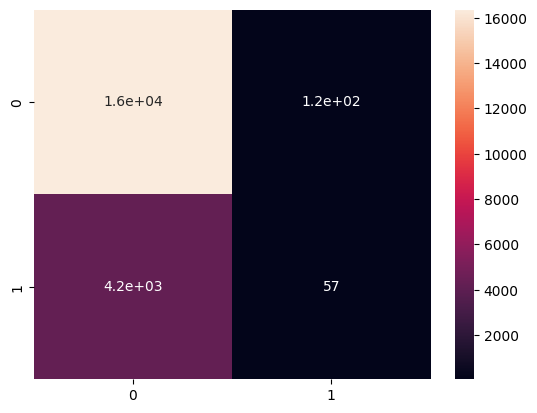

In [140]:
sb.heatmap(confusion_matrix(ytest,ypredict),annot=True)

In [141]:
las=Lasso()
R=Ridge()
EL=ElasticNet()

In [142]:
las.fit(Xtrain,ytrain)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [143]:
d=DecisionTreeClassifier()

In [144]:
d.fit(Xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [145]:
ypr=d.predict(Xtest)

In [150]:
ms=mean_squared_error(ytest,ypr)

In [151]:
ms

0.28460574513206094

In [154]:
mean_absolute_error(ytest,ypredict)

0.20903219587430114